# Overview of Notebook 📓

 This notebook offers a simple exploration of sentiment analysis using NLTK's VADER (Valence Aware Dictionary and sEntiment Reasoner). 
 
 * NLTK (Natural Language Toolkit) is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources, such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

 * VADER is a lexicon and rule-based sentiment analysis tool specifically designed for analyzing social media texts. It provides a pre-trained model that can determine the sentiment polarity (positive, negative, or neutral) of a given text based on the words it contains, along with their context.

Read more on https://www.nltk.org/_modules/nltk/sentiment/vader.html .


# Load Library 📚

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pprint
from wordcloud import WordCloud

plt.style.use('ggplot')

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Load Data 🔍

In [2]:
# Load data
data_dir = '/kaggle/input/whatsapp-business-reviews-app-store/hashed_wab_reviews.csv'
data = pd.read_csv(data_dir)

# Sample data
data.head(2)

,id,date,userName,userUrl,version,score,title,text,url,country,appId
0,10990027692,2024-02-28T13:15:16-07:00,a71209417cc69068db96287dcfa258e84a19b36c443521...,c6434d50f03dc3225343d08cb75b120e19dc21937007da...,24.4.78,1,Status sounds,No sound comes from status videos after I upda...,https://itunes.apple.com/au/review?id=13864129...,AU,1386412985
1,10939311897,2024-02-14T14:47:02-07:00,9f7302dde70e971b057aa14cec1d26479a9362da32e9ed...,55105d432b1d6c664523f5de2576a199f8ffa8d8c20e8a...,24.3.76,2,Calls,"Every time I’m on a phone call, it either cut ...",https://itunes.apple.com/au/review?id=13864129...,AU,1386412985


In [3]:
# Checking dataset shape
data.shape

(1459, 11)

In [4]:
# Checking dataset columns
data.columns

Index(['id', 'date', 'userName', 'userUrl', 'version', 'score', 'title',
       'text', 'url', 'country', 'appId'],
      dtype='object')

# Data Cleaning 🧹

In [5]:
# Select only the 'text' and 'score' columns
data = data[['date', 'text', 'score']]

In [6]:
# Remove rows with missing values
data = data.dropna()

# Confirm that duplicates have been removed
print("Number of null values after removal:\n", data.isnull().sum())

# Remove duplicate rows
data = data.drop_duplicates()

# Confirm that duplicates have been removed
print("Number of duplicates after removal:", data.duplicated().sum())

Number of null values after removal:
 date     0
text     0
score    0
dtype: int64
Number of duplicates after removal: 0


In [7]:
# Preprocess text data
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

data['text'] = data['text'].apply(preprocess_text)

# Display the first few rows of the cleaned dataset
print(data.head(5))

                        date  \
0  2024-02-28T13:15:16-07:00   
1  2024-02-14T14:47:02-07:00   
2  2024-02-12T15:54:56-07:00   
3  2024-01-24T12:47:22-07:00   
4  2023-12-29T05:13:49-07:00   

                                                text  score  
0  no sound comes from status videos after i upda...      1  
1  every time im on a phone call it either cut of...      2  
2  i like being to have a separate accountapp for...      4  
3  dear whatsapp support team\n\ni hope this mess...      5  
4  only seems like someone clicks on your ad when...      2  


In [8]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract month and year into separate columns
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

data.head(5)

,date,text,score,month,year
0,2024-02-28 13:15:16-07:00,no sound comes from status videos after i upda...,1,2,2024
1,2024-02-14 14:47:02-07:00,every time im on a phone call it either cut of...,2,2,2024
2,2024-02-12 15:54:56-07:00,i like being to have a separate accountapp for...,4,2,2024
3,2024-01-24 12:47:22-07:00,dear whatsapp support team\n\ni hope this mess...,5,1,2024
4,2023-12-29 05:13:49-07:00,only seems like someone clicks on your ad when...,2,12,2023


# Data Visulaization 📊

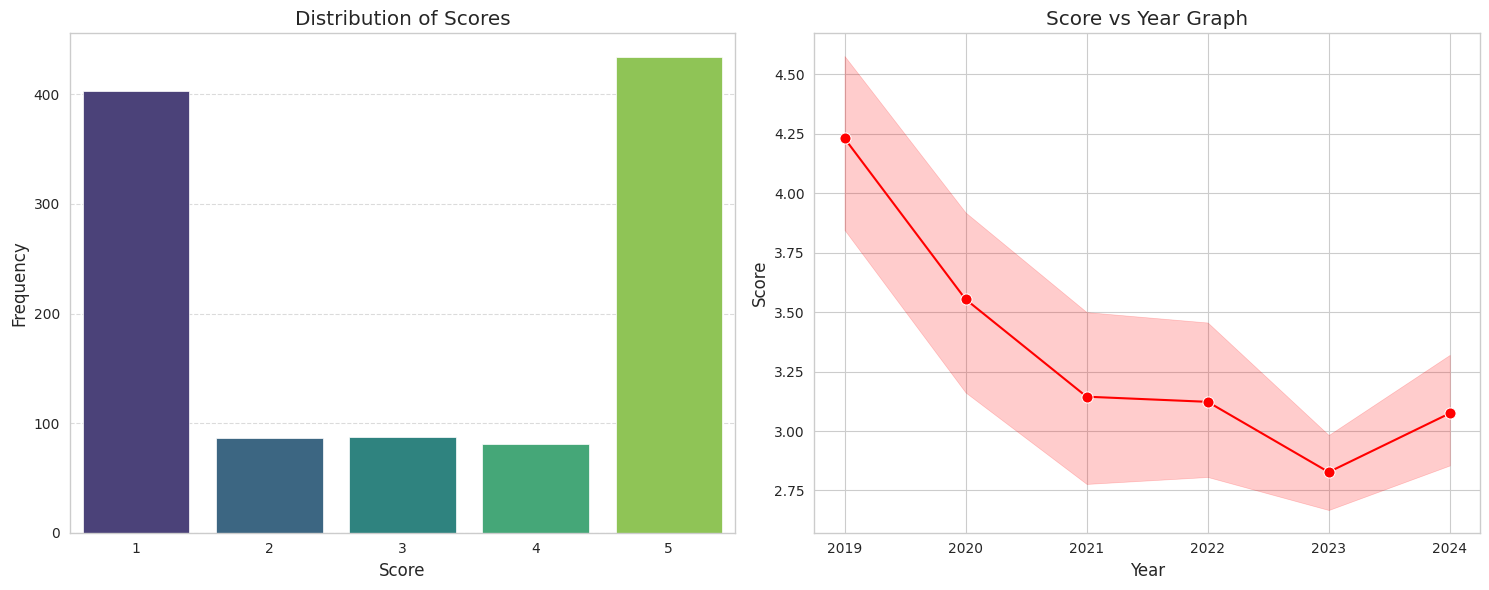

In [9]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plotting countplot (Distribution of Scores)
sns.countplot(data=data, x='score', palette='viridis', ax=axs[0])
axs[0].set_xlabel('Score')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Scores')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plotting lineplot (Score vs Year)
sns.lineplot(data= data, x='year', y='score', marker='o', markersize=8, color='red', ax=axs[1])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Score')
axs[1].set_title('Score vs Year Graph')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

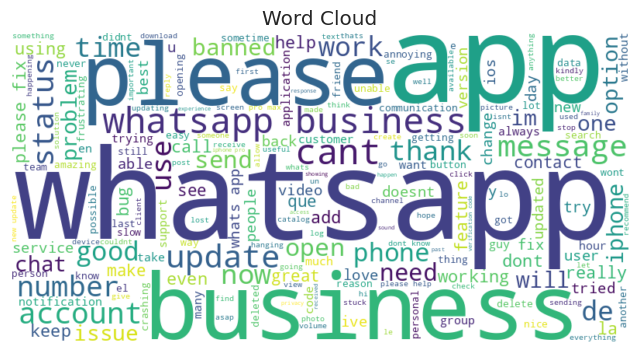

In [10]:
# Combine all text data into a single string
text_combined = ' '.join(data['text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_combined)

# Plot word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')
plt.show()

# Text Preparation NLTK 📝

In [11]:
# Tokenize the 'text' column
data['tokens'] = data['text'].apply(word_tokenize)

# Add POS tags for tokens
data['pos_tags'] = data['tokens'].apply(pos_tag)

# Add chunking (Named Entity Recognition)
data['chunks'] = data['pos_tags'].apply(ne_chunk)

# Display the DataFrame with tokens
pprint.pprint(data['chunks'].head(1))

0    [(no, DT), (sound, NN), (comes, VBZ), (from, I...
Name: chunks, dtype: object


# VADER sentiment scoring 🔧

In [12]:
# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

res = []  # List to store results

# Iterate over each row in the DataFrame using tqdm for progress tracking
for i, row in tqdm(data.iterrows(), total=len(data), desc="Sentiment Analysis"):
    text = row['text']  # Get the text from the 'Text' column

    # Run sentiment analysis on the text
    scores = sia.polarity_scores(text)

    # Store the results
    res.append(scores)

Sentiment Analysis:   0%|          | 0/1091 [00:00<?, ?it/s]

In [13]:
# Remove columns containing date, month, and year from the original DataFrame 'data'
data = data.drop(columns=['date', 'month', 'year'])

# Convert the list of sentiment analysis results to a DataFrame and transpose it
vaders = pd.DataFrame(res)

# Reset the index of 'vaders'
vaders.reset_index(inplace=True)

# Merge 'vaders' with the original DataFrame 'data' using the index
merged_data = vaders.merge(data, left_index=True, right_index=True, how='left')

# Sample of merged_data
merged_data.head(5)

,index,neg,neu,pos,compound,text,score,tokens,pos_tags,chunks
0,0,0.362,0.638,0.000,-0.6249,no sound comes from status videos after i upda...,1.0,"[no, sound, comes, from, status, videos, after...","[(no, DT), (sound, NN), (comes, VBZ), (from, I...","[(no, DT), (sound, NN), (comes, VBZ), (from, I..."
1,1,0.120,0.816,0.064,-0.2960,every time im on a phone call it either cut of...,2.0,"[every, time, im, on, a, phone, call, it, eith...","[(every, DT), (time, NN), (im, NN), (on, IN), ...","[(every, DT), (time, NN), (im, NN), (on, IN), ..."
2,2,0.000,0.675,0.325,0.9460,i like being to have a separate accountapp for...,4.0,"[i, like, being, to, have, a, separate, accoun...","[(i, NNS), (like, VBP), (being, VBG), (to, TO)...","[(i, NNS), (like, VBP), (being, VBG), (to, TO)..."
3,3,0.000,0.743,0.257,0.9786,dear whatsapp support team\n\ni hope this mess...,5.0,"[dear, whatsapp, support, team, i, hope, this,...","[(dear, JJ), (whatsapp, NN), (support, NN), (t...","[(dear, JJ), (whatsapp, NN), (support, NN), (t..."
4,4,0.000,0.815,0.185,0.3612,only seems like someone clicks on your ad when...,2.0,"[only, seems, like, someone, clicks, on, your,...","[(only, RB), (seems, VBZ), (like, IN), (someon...","[(only, RB), (seems, VBZ), (like, IN), (someon..."


# Build Insights 📈

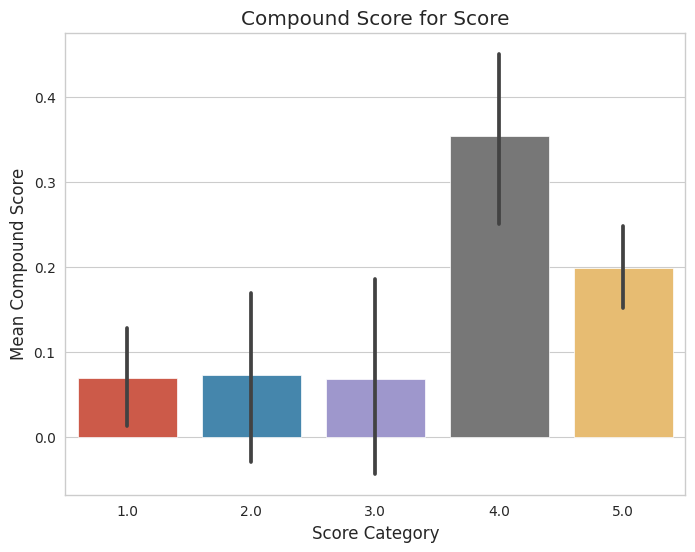

In [14]:
# Plotting the mean compound sentiment score for each score category
plt.figure(figsize=(8, 6))
sns.barplot(data=merged_data, x='score', y='compound', estimator='mean')
plt.title('Compound Score for Score')
plt.xlabel('Score Category')
plt.ylabel('Mean Compound Score')
plt.show()

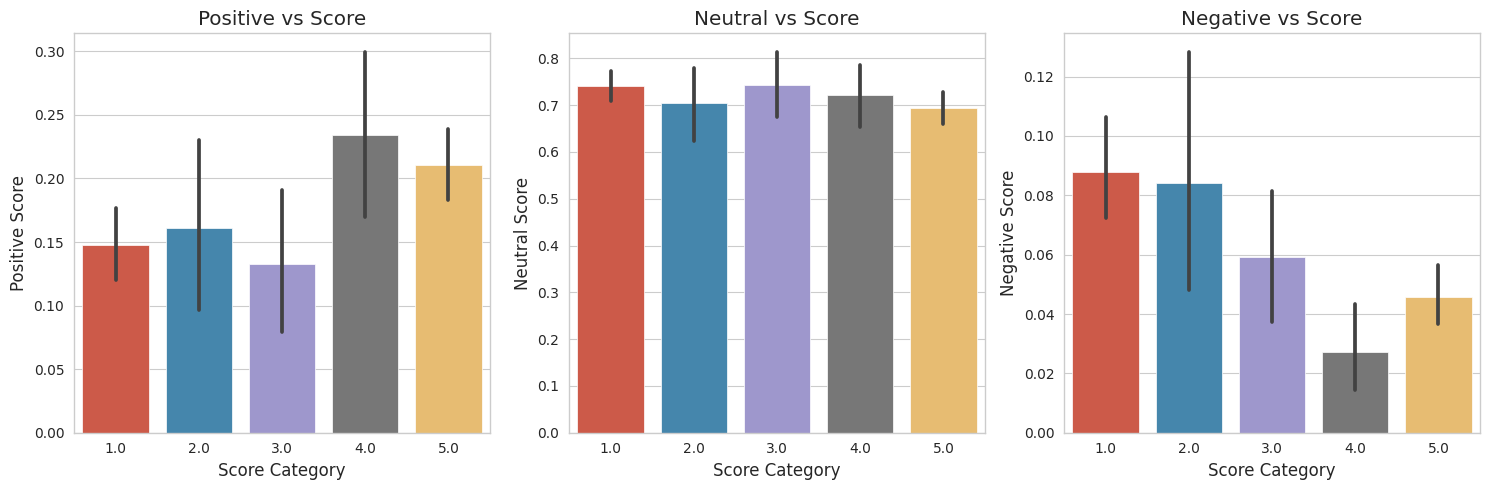

In [15]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

# Plotting mean positive sentiment scores for each score category
sns.barplot(data=merged_data, x='score', y='pos', estimator='mean', ax=axes[0])
axes[0].set_title('Positive vs Score')
axes[0].set_ylabel('Positive Score')
axes[0].set_xlabel('Score Category')

# Plotting mean neutral sentiment scores for each score category
sns.barplot(data=merged_data, x='score', y='neu', estimator='mean', ax=axes[1])
axes[1].set_title('Neutral vs Score')
axes[1].set_ylabel('Neutral Score')
axes[1].set_xlabel('Score Category')

# Plotting mean negative sentiment scores for each score category
sns.barplot(data=merged_data, x='score', y='neg', estimator='mean', ax=axes[2])
axes[2].set_title('Negative vs Score')
axes[2].set_ylabel('Negative Score')
axes[2].set_xlabel('Score Category')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()